<a href="https://colab.research.google.com/github/somesh636/DDoS_Attack_Analysis/blob/master/DDoS_ML_AI_TTSData_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np

In [2]:
DrDoS_DNS = pd.read_csv('/home/user/dl_mamba/Mamba-CNN-Ddos/CSV01/DrDoS_DNS.csv',low_memory=False)
DrDoS_LDAP = pd.read_csv('/home/user/dl_mamba/Mamba-CNN-Ddos/CSV01/DrDoS_LDAP.csv',low_memory=False)
DrDoS_MSSQL = pd.read_csv('/home/user/dl_mamba/Mamba-CNN-Ddos/CSV01/DrDoS_MSSQL.csv',low_memory=False)
DrDoS_NetBIOS = pd.read_csv('/home/user/dl_mamba/Mamba-CNN-Ddos/CSV01/DrDoS_NetBIOS.csv',low_memory=False)
DrDoS_NTP = pd.read_csv('/home/user/dl_mamba/Mamba-CNN-Ddos/CSV01/DrDoS_NTP.csv',low_memory=False)
DrDoS_SNMP = pd.read_csv('/home/user/dl_mamba/Mamba-CNN-Ddos/CSV01/DrDoS_SNMP.csv',low_memory=False)
DrDoS_SSDP = pd.read_csv('/home/user/dl_mamba/Mamba-CNN-Ddos/CSV01/DrDoS_SSDP.csv',low_memory=False)
DrDoS_UDP = pd.read_csv('/home/user/dl_mamba/Mamba-CNN-Ddos/CSV01/DrDoS_UDP.csv',low_memory=False)
Syn = pd.read_csv('/home/user/dl_mamba/Mamba-CNN-Ddos/CSV01/Syn.csv',low_memory=False)
UDPLag = pd.read_csv('/home/user/dl_mamba/Mamba-CNN-Ddos/CSV01/UDPLag.csv',low_memory=False)

In [3]:
# Merge all DS
data = pd.concat([DrDoS_DNS, DrDoS_LDAP, DrDoS_MSSQL, DrDoS_NetBIOS, DrDoS_NTP, DrDoS_SNMP, DrDoS_SSDP, DrDoS_UDP, Syn, UDPLag], ignore_index = True)

In [4]:
data.shape

(29955285, 88)

In [5]:

col_name = {col: col.strip() for col in data.columns}
data.rename(columns = col_name, inplace = True)

In [6]:
data['Label'].value_counts()

Label
DrDoS_SNMP       5159870
DrDoS_DNS        5071011
DrDoS_MSSQL      4522492
DrDoS_NetBIOS    4093279
DrDoS_UDP        3134645
DrDoS_SSDP       2610611
DrDoS_LDAP       2179930
Syn              1582289
DrDoS_NTP        1202642
UDP-lag           366461
BENIGN             31616
WebDDoS              439
Name: count, dtype: int64

In [7]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')] #Automatically drop all "Unnamed" columns

In [8]:
data.columns 

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [9]:
missing_val = data.isna().sum()
missing_val = missing_val[missing_val > 0]
for col, count in missing_val.items():
    print(f"{col}: {count} missing values")

Flow Bytes/s: 238527 missing values


In [10]:
numeric_data = data.select_dtypes(include=np.number)
inf_counts = np.isinf(numeric_data).sum()

for col, count in inf_counts.items():
    if count > 0:
        print(f"{col}: {count} infinite values")

Flow Bytes/s: 557948 infinite values
Flow Packets/s: 796475 infinite values


In [11]:
print(f'Initial missing data: {data.isna().sum().sum()}')
data.replace([np.inf, -np.inf], np.nan, inplace = True)
print(f'Missing values after processing infinite data: {data.isna().sum().sum()}')

Initial missing data: 238527
Missing values after processing infinite data: 1592950


In [12]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      796475
Flow Packets/s    796475
dtype: int64


In [13]:
# Calculating missing value % in the dataset
for col, count in missing.items():
    if count > 0:
        percent = round((count / len(data)) * 100, 2)
        print(f"{col}: {count} missing values ({percent}%)")

Flow Bytes/s: 796475 missing values (2.66%)
Flow Packets/s: 796475 missing values (2.66%)


In [14]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  802000000.0
Median of Flow Packets/s:  2000000.0


In [15]:
# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

/tmp/ipykernel_7911/1818654804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
/tmp/ipykernel_7911/1818654804.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [16]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


In [17]:
data['Label'].unique()

array(['DrDoS_DNS', 'BENIGN', 'DrDoS_LDAP', 'DrDoS_MSSQL',
       'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
       'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS'], dtype=object)

In [18]:
# Types of anomaly & normal instances (BENIGN)
data['Label'].value_counts()

Label
DrDoS_SNMP       5159870
DrDoS_DNS        5071011
DrDoS_MSSQL      4522492
DrDoS_NetBIOS    4093279
DrDoS_UDP        3134645
DrDoS_SSDP       2610611
DrDoS_LDAP       2179930
Syn              1582289
DrDoS_NTP        1202642
UDP-lag           366461
BENIGN             31616
WebDDoS              439
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
data['Label code'] = LabelEncoder().fit_transform(data['Label'])
print(data['Label code'].unique())

[ 1  0  2  3  5  4  6  7  8  9 10 11]


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Label code'] = le.fit_transform(data['Label'])

# Print the mapping using the fitted encoder
for val in sorted(data['Label code'].unique()):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: DrDoS_DNS
2: DrDoS_LDAP
3: DrDoS_MSSQL
4: DrDoS_NTP
5: DrDoS_NetBIOS
6: DrDoS_SNMP
7: DrDoS_SSDP
8: DrDoS_UDP
9: Syn
10: UDP-lag
11: WebDDoS


In [21]:
corr = data.corr(numeric_only = True).round(2)


In [22]:
corr.style.background_gradient(cmap = 'Spectral', axis = None).format(precision = 2) #for display 

This code identifies and lists all features in your dataset that are positively correlated with the label (target variable),
Understand which features might be useful for classification or prediction
Do feature selection based on correlation

In [23]:
#Finds Positive Correlations
positive_corr_features = corr['Label code'][(corr['Label code'] > 0) & (corr['Label code'] < 1)].index.tolist()
print("Features with positive correlation with 'Label':\n")
for i, feature in enumerate(positive_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Label code']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Label':

1.  Source Port              :0.43
2.  Destination Port         :0.01
3.  Flow Duration            :0.13
4.  Total Backward Packets   :0.01
5.  Fwd Packet Length Std    :0.21
6.  Flow IAT Mean            :0.14
7.  Flow IAT Std             :0.14
8.  Flow IAT Max             :0.13
9.  Fwd IAT Total            :0.13
10. Fwd IAT Mean             :0.14
11. Fwd IAT Std              :0.14
12. Fwd IAT Max              :0.13
13. Bwd IAT Total            :0.03
14. Bwd IAT Mean             :0.04
15. Bwd IAT Std              :0.04
16. Bwd IAT Max              :0.03
17. Bwd IAT Min              :0.05
18. Fwd Header Length        :0.01
19. Bwd Packets/s            :0.06
20. Packet Length Std        :0.17
21. ACK Flag Count           :0.45
22. Down/Up Ratio            :0.09
23. Fwd Header Length.1      :0.01
24. Subflow Bwd Packets      :0.01
25. Init_Win_bytes_forward   :0.38
26. min_seg_size_forward     :0.03
27. Active Mean              :0.01
28. A

In [24]:
print(f'Number of considerable important features: {len(positive_corr_features)}')

Number of considerable important features: 34


#Show Negatively Correlated Features

In [25]:
# Select features with negative correlation to 'Label code' (but not exactly -1)
neg_corr_features = corr['Label code'][(corr['Label code'] < 0) & (corr['Label code'] > -1)] \
    .sort_values().index.tolist()

print("Features with negative correlation with 'Label':\n")
for i, feature in enumerate(neg_corr_features, start=1):
    corr_value = corr.loc[feature, 'Label code']
    print(f"{i:<3} {feature:<24} : {corr_value:.4f}")

Features with negative correlation with 'Label':

1   Fwd Packet Length Mean   : -0.5400
2   Flow Bytes/s             : -0.5400
3   Packet Length Mean       : -0.5400
4   Average Packet Size      : -0.5400
5   Avg Fwd Segment Size     : -0.5400
6   Min Packet Length        : -0.5300
7   Max Packet Length        : -0.5300
8   Fwd Packet Length Min    : -0.5300
9   Fwd Packet Length Max    : -0.5300
10  Protocol                 : -0.4500
11  Fwd Packets/s            : -0.2700
12  Flow Packets/s           : -0.2600
13  Total Length of Fwd Packets : -0.0900
14  Subflow Fwd Bytes        : -0.0900
15  URG Flag Count           : -0.0300
16  act_data_pkt_fwd         : -0.0300
17  Init_Win_bytes_backward  : -0.0200
18  Bwd Packet Length Std    : -0.0200
19  Bwd Packet Length Mean   : -0.0200
20  Fwd PSH Flags            : -0.0200
21  Bwd Packet Length Min    : -0.0200
22  CWE Flag Count           : -0.0200
23  Avg Bwd Segment Size     : -0.0200
24  RST Flag Count           : -0.0200
25  Bwd Pac

In [26]:
print(f'Number of considerable important features: {len(neg_corr_features)}')

Number of considerable important features: 25


data.std(numeric_only=True): Calculates the standard deviation for each numeric column in the DataFrame data. The numeric_only=True parameter ensures that only numeric columns are considered, ignoring any non-numeric data.​
std[std == 0]: Filters the resulting Series std to include only those columns where the standard deviation is exactly zero. This implies that all the values in these columns are the same.​
.index.tolist(): Extracts the names of these columns (i.e., the index labels) and converts them into a list.
Explanation:
Calculates the standard deviation for all numeric columns in data.
numeric_only=True ensures only numeric columns are considered
Filters the columns where the standard deviation is exactly zero.
Extracts their names (index) as a list.

Why It’s Useful:
Columns with zero standard deviation:
Carry no useful information for most machine learning models
Can be safely removed during feature selection

In [27]:
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29955285 entries, 0 to 29955284
Data columns (total 88 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  int64  
 3   Destination IP               object 
 4   Destination Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow Duration                int64  
 8   Total Fwd Packets            int64  
 9   Total Backward Packets       int64  
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet Length Mean       float64
 19

In [29]:
data = data.drop(columns=["Flow ID", "Source IP", "Destination IP", "Timestamp"], errors='ignore')
data = data.drop(['SimillarHTTP', 'Label code'], axis = 1)


In [30]:
# For improving performance and reduce memory-related errors
# Initial memory usage
start_mem = data.memory_usage().sum() / 1024**2
print(f'Initial memory usage: {start_mem:.2f} MB')

# Optimize numeric columns
for col in data.select_dtypes(include=[np.number]).columns:
    col_min = data[col].min()
    col_max = data[col].max()
    col_type = data[col].dtype

    # Downcast floats
    if np.issubdtype(col_type, np.floating):
        if np.finfo(np.float32).min < col_min < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

    # Downcast integers
    elif np.issubdtype(col_type, np.integer):
        if np.iinfo(np.int32).min < col_min < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

# Final memory usage
end_mem = data.memory_usage().sum() / 1024**2
print(f'Final memory usage: {end_mem:.2f} MB')
print(f'Memory reduced by {(start_mem - end_mem):.2f} MB ({100 * (start_mem - end_mem) / start_mem:.1f}%)')

Initial memory usage: 18740.34 MB
Final memory usage: 9712.98 MB
Memory reduced by 9027.36 MB (48.2%)


In [31]:

data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29955285 entries, 0 to 29955284
Data columns (total 82 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Source Port                  int32  
 1   Destination Port             int32  
 2   Protocol                     int32  
 3   Flow Duration                int32  
 4   Total Fwd Packets            int32  
 5   Total Backward Packets       int32  
 6   Total Length of Fwd Packets  float32
 7   Total Length of Bwd Packets  float32
 8   Fwd Packet Length Max        float32
 9   Fwd Packet Length Min        float32
 10  Fwd Packet Length Mean       float32
 11  Fwd Packet Length Std        float32
 12  Bwd Packet Length Max        float32
 13  Bwd Packet Length Min        float32
 14  Bwd Packet Length Mean       float32
 15  Bwd Packet Length Std        float32
 16  Flow Bytes/s                 float32
 17  Flow Packets/s               float32
 18  Flow IAT Mean                float32
 19

,count,mean,std,min,25%,50%,75%,max
Source Port,29955285.0,18014.627575,2.298102e+04,0.0,690.0,930.0,40471.0,65532.0
Destination Port,29955285.0,32870.442951,1.888171e+04,0.0,16550.0,32875.0,49227.0,65535.0
Protocol,29955285.0,16.291047,2.702146e+00,0.0,17.0,17.0,17.0,17.0
Flow Duration,29955285.0,522512.111902,6.698239e+06,0.0,1.0,1.0,3.0,119999997.0
Total Fwd Packets,29955285.0,6.021484,3.159785e+02,1.0,2.0,2.0,2.0,100148.0
...,...,...,...,...,...,...,...,...
Idle Mean,29955285.0,123489.140625,1.590994e+06,0.0,0.0,0.0,0.0,119219448.0
Idle Std,29955285.0,34127.632812,5.403830e+05,0.0,0.0,0.0,0.0,66002916.0
Idle Max,29955285.0,169403.031250,2.189428e+06,0.0,0.0,0.0,0.0,119219448.0
Idle Min,29955285.0,90981.257812,1.251077e+06,0.0,0.0,0.0,0.0,119219448.0


In [32]:

type(data)
data.to_csv('data_cleaned.csv', index=False)


In [33]:
#import pandas as pd 
#import numpy as np
#data = pd.read_csv('data_cleaned.csv', low_memory=False)

In [34]:
# Drop columns having only one unique value
# Count unique values per column
unique_counts = data.nunique()

# Identify columns with only one unique value
constant_cols = unique_counts[unique_counts == 1]
print("Columns with only one unique value:")
print(constant_cols)

# Drop these columns from the DataFrame
data = data.drop(columns=constant_cols.index)

# Output dropped column names
print("Dropped columns:")
print(constant_cols.index.tolist())

Columns with only one unique value:
Bwd PSH Flags           1
Fwd URG Flags           1
Bwd URG Flags           1
FIN Flag Count          1
PSH Flag Count          1
ECE Flag Count          1
Fwd Avg Bytes/Bulk      1
Fwd Avg Packets/Bulk    1
Fwd Avg Bulk Rate       1
Bwd Avg Bytes/Bulk      1
Bwd Avg Packets/Bulk    1
Bwd Avg Bulk Rate       1
dtype: int64
Dropped columns:
['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [35]:
#data_df = data_real.dropna(axis=0)
data.shape

(29955285, 70)

In [36]:
#data_df.isnull().sum().sum()
data.isnull().sum().sum()

0

In [37]:
data.columns

Index(['Source Port', 'Destination Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Fl

(split → upsample → merge → relabel → sample)

In [38]:
# Creating a balanced dataset for Binary Classification
# Split data into BENIGN and intrusion traffic
benign_data = data[data['Label'] == 'BENIGN']
attack_data = data[data['Label'] != 'BENIGN']

# Upsample benign traffic to match number of intrusions
benign_data_upsampled = benign_data.sample(n=len(attack_data), replace=True)

# Combine into a balanced dataset
balanced_data = pd.concat([attack_data, benign_data_upsampled])

# Convert labels: 0 = BENIGN, 1 = Intrusion
balanced_data['Label'] = np.where(balanced_data['Label'] == 'BENIGN', 0, 1)

# Sample 90,000 records for binary classification
bl_bc_data = balanced_data.sample(n=90000)

# Display class distribution
print(bl_bc_data['Label'].value_counts())

Label
0    45181
1    44819
Name: count, dtype: int64


In [39]:
bl_bc_data.columns

Index(['Source Port', 'Destination Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Fl

In [40]:
print(data['Label'].unique())

['DrDoS_DNS' 'BENIGN' 'DrDoS_LDAP' 'DrDoS_MSSQL' 'DrDoS_NetBIOS'
 'DrDoS_NTP' 'DrDoS_SNMP' 'DrDoS_SSDP' 'DrDoS_UDP' 'Syn' 'UDP-lag'
 'WebDDoS']


In [41]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_bc = bl_bc_data.drop('Label', axis = 1).values
y_bc = bl_bc_data['Label'].values

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc,y_bc, test_size = 0.25,stratify=y_bc, random_state = 42)

scaler = StandardScaler()
X_train_bc = scaler.fit_transform(X_train_bc).reshape(-1, 1, X_bc.shape[1])
X_test_bc = scaler.transform(X_test_bc).reshape(-1, 1, X_bc.shape[1])

input_dim = X_train_bc.shape[2]


In [42]:
import numpy as np
# 1. Convert X_train_bc and X_test_bc to scaled numpy arrays if they aren't already
X_train_bc_np = np.array(X_train_bc)
X_test_bc_np = np.array(X_test_bc)

In [43]:
y_train_bc_np = np.array(y_train_bc)
y_test_bc_np = np.array(y_test_bc)

In [44]:

print(np.bincount(y_train_bc_np))
print(np.bincount(y_test_bc_np))

[33886 33614]
[11295 11205]


In [45]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train_bc_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_bc_np, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_bc_np, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_bc_np, dtype=torch.long)

In [46]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

There is only Transformer encoder stack, and there is no decoder layer. Transformers have two main components:
-Encoder: For input understanding (used in classification, feature extraction)
-Decoder: For output generation (used in machine translation, summarization)
we're doing sequence or tabular classification, not sequence generation.
So the architecture only needs the encoder part of the Transformer to:

-Model input flow features 
-Detect patterns 
-Output class probabilities (Benign or DDoS)

so The decoder is unnecessary and would add unneeded complexity here



In [47]:


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from mamba_ssm import Mamba
import torch.nn as nn

class MambaCNN(nn.Module):
    def __init__(self, input_dim, seq_len, num_classes=2):
        super(MambaCNN, self).__init__()

        self.embedding = nn.Linear(input_dim, 128)
        self.mamba = Mamba(d_model=128)  # Mamba module from state-space models

        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.embedding(x)          # (B, S, 128)
        x = self.mamba(x)              # Mamba processes the sequence
        x = x.transpose(1, 2)          # (B, 128, S) for CNN
        x = self.cnn(x)                # CNN block
        x = self.fc(x)                 # Final classifier
        return x

In [48]:
print(torch.isnan(X_train_tensor).any())
print(torch.isinf(X_train_tensor).any())
print(y_train_tensor.dtype)  # Should be torch.long
print(torch.unique(y_train_tensor))  # Should be [0, 1] or class indices
print("Train:", torch.bincount(y_train_tensor))
print("Val:  ", torch.bincount(y_test_tensor))

tensor(False)
tensor(False)
torch.int64
tensor([0, 1])
Train: tensor([33886, 33614])
Val:   tensor([11295, 11205])


X_train_tensor.shape = torch.Size([67500, 1, 69])
X_test_tensor.shape  = torch.Size([22500, 1, 69])
Epoch [1/100] Train Loss: 183.0957, Train Acc: 50.12% Val Loss: 60.9776, Val Acc: 49.80%
Epoch [2/100] Train Loss: 182.5869, Train Acc: 52.23% Val Loss: 60.5797, Val Acc: 52.09%
Epoch [3/100] Train Loss: 178.4555, Train Acc: 69.99% Val Loss: 57.2320, Val Acc: 96.25%
Epoch [4/100] Train Loss: 150.6162, Train Acc: 95.96% Val Loss: 39.9001, Val Acc: 97.85%
Epoch [5/100] Train Loss: 81.9891, Train Acc: 97.89% Val Loss: 17.4839, Val Acc: 97.87%
Epoch [6/100] Train Loss: 40.6950, Train Acc: 98.27% Val Loss: 10.1896, Val Acc: 98.32%
Epoch [7/100] Train Loss: 25.1363, Train Acc: 98.54% Val Loss: 6.6115, Val Acc: 98.48%
Epoch [8/100] Train Loss: 16.7721, Train Acc: 98.57% Val Loss: 4.6448, Val Acc: 98.54%
Epoch [9/100] Train Loss: 12.0554, Train Acc: 98.67% Val Loss: 3.5402, Val Acc: 98.70%
Epoch [10/100] Train Loss: 9.3180, Train Acc: 98.88% Val Loss: 2.8647, Val Acc: 98.90%
Epoch [11/100] Train

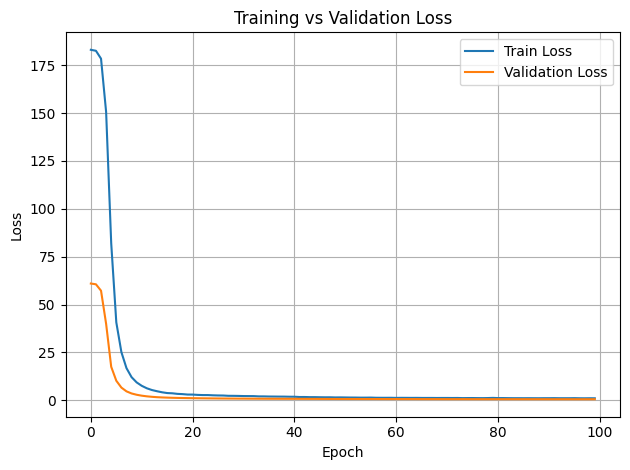

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11295
           1       1.00      1.00      1.00     11205

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500



In [49]:

print("X_train_tensor.shape =", X_train_tensor.shape)
print("X_test_tensor.shape  =", X_test_tensor.shape)

#optimizer.zero_grad()
#print("Input shape to model:", inputs.shape)
       

import torch.optim as optim
from sklearn.metrics import accuracy_score
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = TransformerCNN(input_dim=input_dim, seq_len=1, num_classes=2)
model = MambaCNN(input_dim=input_dim, seq_len=1, num_classes=2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)
epochs = 100
model.to(device)
total_train_loss = 0

train_losses = []
val_losses = []

for epoch in range(1, epochs + 1):
    model.train()
    train_loss, train_preds, train_labels = 0, [], []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_preds += outputs.argmax(dim=1).cpu().tolist()
        train_labels += labels.cpu().tolist()

    train_acc = accuracy_score(train_labels, train_preds)
    train_losses.append(train_loss)

        # Validation
    model.eval()
    val_loss, val_preds, val_labels = 0, [], []

    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            val_preds += outputs.argmax(dim=1).cpu().tolist()
            val_labels += labels.cpu().tolist()


    val_acc = accuracy_score(val_labels, val_preds)
    val_losses.append(val_loss) 

    print(f"Epoch [{epoch}/{epochs}] "
         f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}% "
         f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")


import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

     
from sklearn.metrics import classification_report
print(classification_report(val_labels, val_preds))


   


Generate predictions

Plot the confusion matrix

Plot the Precision-Recall and ROC curves

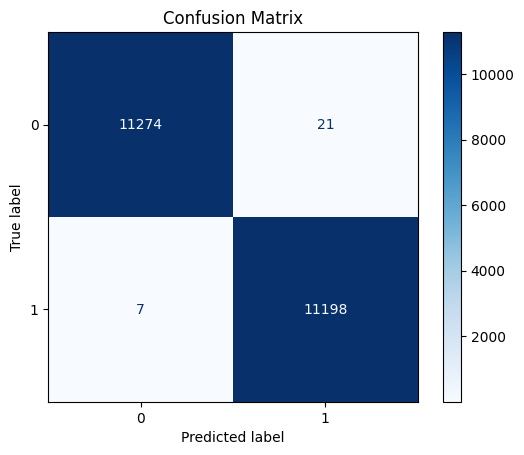

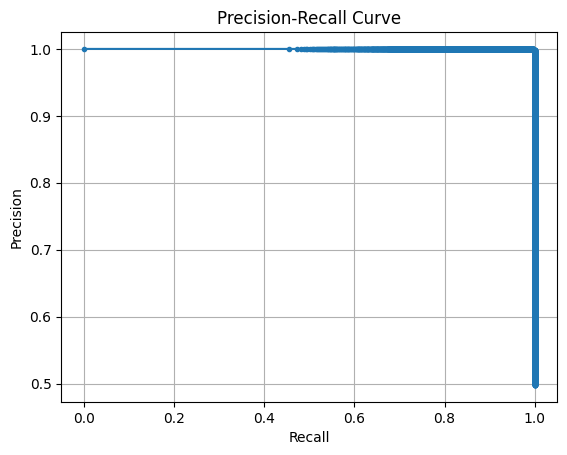

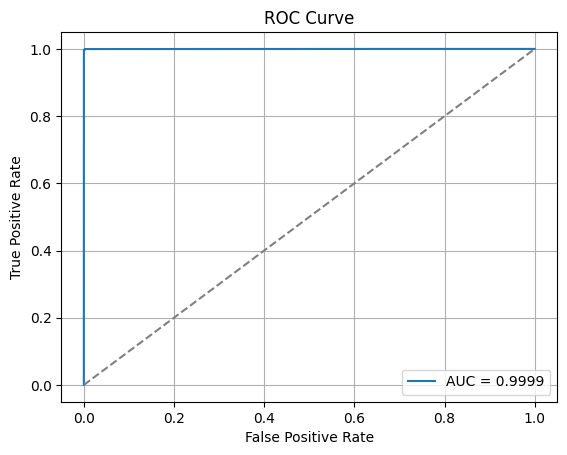

In [50]:
import torch
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, roc_curve, auc
)
import matplotlib.pyplot as plt

# Get model predictions
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:  # Assuming you use a DataLoader for test
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 1. Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 2. Precision-Recall Curve
probs = []
model.eval()
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs.extend(torch.softmax(outputs, dim=1)[:, 1].cpu().numpy())  # Class 1 probabilities

precision, recall, _ = precision_recall_curve(all_labels, probs)

plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# 3. ROC Curve
fpr, tpr, _ = roc_curve(all_labels, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


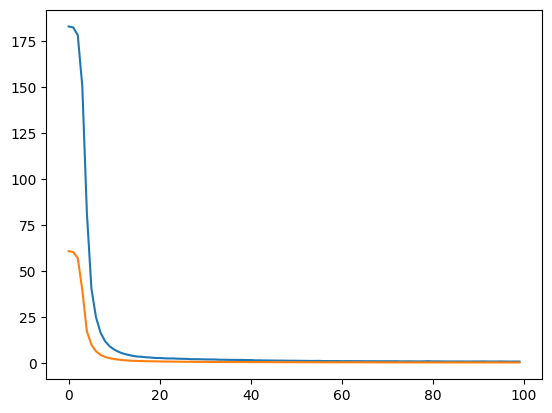

In [51]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')


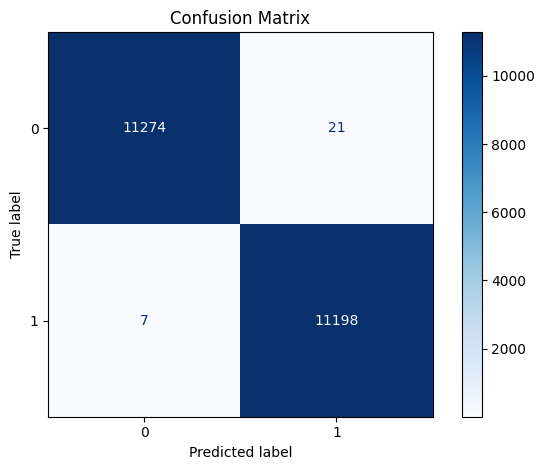

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(val_labels, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # 0=Benign, 1=Attack
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

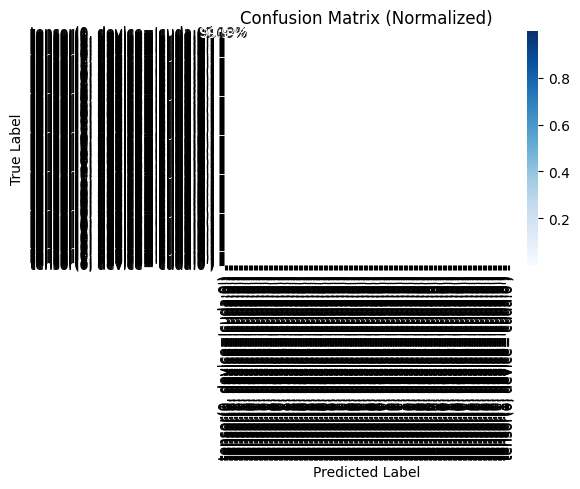

In [54]:
import numpy as np
import seaborn as sns
cm = confusion_matrix(val_labels, val_preds)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Normalized)')
plt.tight_layout()
plt.show()